In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.spatial.transform import Rotation as R

/home/su/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Motion capture

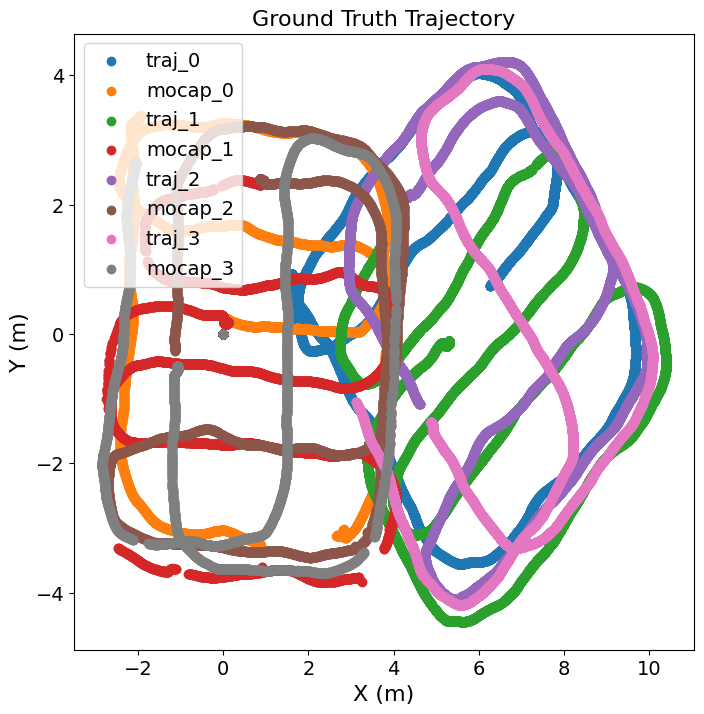

In [2]:
num_traj = 4

t_hist = {}
P_TA_hist = {}
R_TA_hist = {}
P_M_hist = {}
R_M_hist = {}

for j in range(0, num_traj):
    start = f'dataset/Ground_Truth_Evaluation/magpie2Dataset_loc00{j}_start.csv'
    area  = f'dataset/Ground_Truth_Evaluation/magpie2Dataset_loc00{j}_area.csv'
    mocap = f'dataset/Ground_Truth_Evaluation/magpie2Dataset_loc00{j}_mocap.csv'

    dfs = pd.read_csv(start)
    dfa = pd.read_csv(area)
    dfm = pd.read_csv(mocap)

    ts  = np.array((dfs['t'] - dfs['t'][0])*10e-9)
    pxs = np.array(dfs['px'])
    pys = np.array(dfs['py'])
    pzs = np.array(dfs['pz'])
    rxs = np.array(dfs['rx'])
    rys = np.array(dfs['ry'])
    rzs = np.array(dfs['rz'])
    rws = np.array(dfs['rw'])

    tm  = np.array((dfm['t'] - dfm['t'][0])*10e-9)
    pxm = np.array(dfm['px'])
    pym = np.array(dfm['py'])
    pzm = np.array(dfm['pz'])
    rxm = np.array(dfm['rx'])
    rym = np.array(dfm['ry'])
    rzm = np.array(dfm['rz'])
    rwm = np.array(dfm['rw'])

    pxa = np.array(dfa['px'])
    pya = np.array(dfa['py'])
    pza = np.array(dfa['pz'])
    rxa = np.array(dfa['rx'])
    rya = np.array(dfa['ry'])
    rza = np.array(dfa['rz'])
    rwa = np.array(dfa['rw'])

    p_hist = []
    r_hist = []
    pm_hist = []
    rm_hist = []
    T_AS = np.eye(4)
    T_SD = np.eye(4)

    length = np.min([len(dfs), len(dfa)])
    for i in range(length):
        q_AS = [rxa[i], rya[i], rza[i], rwa[i]]
        R_AS = R.from_quat(q_AS).as_matrix()
        P_AS = [pxa[i], pya[i], pza[i]]
        T_AS[:3, :3] = R_AS
        T_AS[:3, 3] = P_AS

        q_SD = [rxs[i], rys[i], rzs[i], rws[i]]
        R_SD = R.from_quat(q_SD).as_matrix()
        P_SD = np.array([pxs[i], pys[i], pzs[i]])
        T_SD[:3, :3] = R_SD
        T_SD[:3, 3]  = P_SD
        T_AD = np.dot(T_AS, T_SD)

        p_hist.append(T_AD[:3, 3])
        
        R_AD = T_AD[:3, :3]
        angles = R.from_matrix(R_AD).as_euler('xyz', degrees=True)
        r_hist.append(angles)

    P_TA_hist[f'traj_{j}'] = np.array(p_hist)
    R_TA_hist[f'traj_{j}'] = np.array(r_hist)

    for i in range(len(dfm)):
        # q_M = [rxm[i], rym[i], rzm[i], rwm[i]]
        # R_M = R.from_quat(q_M)
        P_M = np.array([pxm[i], pym[i], pzm[i]])
        # angles = R_M.as_euler('xyz', degrees=True)
        pm_hist.append(P_M)
        # rm_hist.append(angles)

    P_M_hist[f'mocap_{j}'] = np.array(pm_hist)
    # R_M_hist[f'mocap_{j}'] = np.array(rm_hist)

fig = plt.figure(figsize=(8, 8))

for j in range(0, num_traj):
    # if j not in [7, 8, 9, 10, 11, 12, 13, 14]:
    plt.scatter(P_TA_hist[f'traj_{j}'][:,0], P_TA_hist[f'traj_{j}'][:,1], label=f'traj_{j}')
    plt.scatter(P_M_hist[f'mocap_{j}'][:,0], P_M_hist[f'mocap_{j}'][:,1], label=f'mocap_{j}')
plt.xlabel('X (m)', fontsize=16)
plt.ylabel('Y (m)', fontsize=16)
plt.title('Ground Truth Trajectory', fontsize=16)
# plt.legend()
plt.legend(ncol=1, fancybox=True, frameon=True, fontsize=14, loc='upper left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.grid(True)
plt.show()

Talbot_UGV / CSL_WLK

In [9]:
num_traj = 8

t_hist = {}
P_TA_hist = {}
R_TA_hist = {}

for j in range(1, num_traj+1):
    start = f'dataset/Talbot_UGV/magpie2Dataset_{j}_tango_start.csv'
    area  = f'dataset/Talbot_UGV/magpie2Dataset_{j}_tango_area.csv'

    dfs = pd.read_csv(start)
    dfa = pd.read_csv(area)

    ts  = np.array((dfs['t'] - dfs['t'][0])*10e-9)
    pxs = np.array(dfs['px'])
    pys = np.array(dfs['py'])
    pzs = np.array(dfs['pz'])
    rxs = np.array(dfs['rx'])
    rys = np.array(dfs['ry'])
    rzs = np.array(dfs['rz'])
    rws = np.array(dfs['rw'])

    pxa = np.array(dfa['px'])
    pya = np.array(dfa['py'])
    pza = np.array(dfa['pz'])
    rxa = np.array(dfa['rx'])
    rya = np.array(dfa['ry'])
    rza = np.array(dfa['rz'])
    rwa = np.array(dfa['rw'])

    p_hist = []
    r_hist = []
    pm_hist = []
    rm_hist = []
    T_AS = np.eye(4)
    T_SD = np.eye(4)

    length = np.min([len(dfs), len(dfa)])
    for i in range(length):
        q_AS = [rxa[i], rya[i], rza[i], rwa[i]]
        R_AS = R.from_quat(q_AS).as_matrix()
        P_AS = [pxa[i], pya[i], pza[i]]
        T_AS[:3, :3] = R_AS
        T_AS[:3, 3] = P_AS

        q_SD = [rxs[i], rys[i], rzs[i], rws[i]]
        R_SD = R.from_quat(q_SD).as_matrix()
        P_SD = np.array([pxs[i], pys[i], pzs[i]])
        T_SD[:3, :3] = R_SD
        T_SD[:3, 3]  = P_SD
        T_AD = np.dot(T_AS, T_SD)

        p_hist.append(T_AD[:3, 3])
        
        R_AD = T_AD[:3, :3]
        angles = R.from_matrix(R_AD).as_euler('xyz', degrees=True)
        r_hist.append(angles)

    P_TA_hist[f'traj_{j}'] = np.array(p_hist)
    R_TA_hist[f'traj_{j}'] = np.array(r_hist)

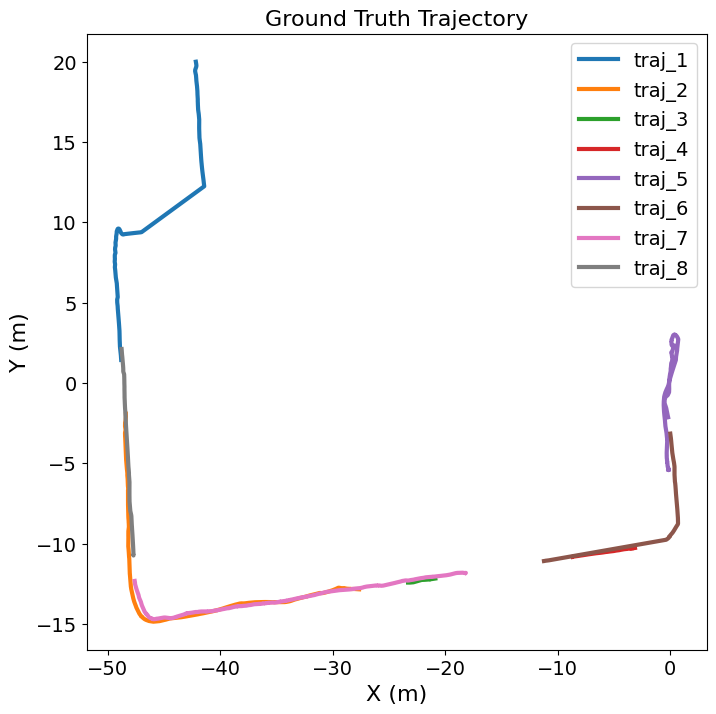

In [10]:
fig = plt.figure(figsize=(8, 8))

for j in range(1, num_traj+1):
    plt.plot(P_TA_hist[f'traj_{j}'][:,0], P_TA_hist[f'traj_{j}'][:,1], linewidth=3, label=f'traj_{j}')
plt.xlabel('X (m)', fontsize=16)
plt.ylabel('Y (m)', fontsize=16)
plt.title('Ground Truth Trajectory', fontsize=16)
plt.legend(ncol=1, fancybox=True, frameon=True, fontsize=14, loc='upper right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.xlim([-30, 40])
# plt.ylim([-30, 40])

# plt.grid(True)
plt.show()